<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/kep.png" height=75 width=75>
*This notebook uses routines from [PyKE](http://github.com/keplerGO/PyKE/) which is documented [here](http://pyke.keplerscience.org/). You can find these notebooks on [GitHub](https://github.com/christinahedges/k2torials)*

<!--NAVIGATION-->
< [Investigating Light Curve Files](01.02-Investigating-LC-Files.ipynb) | [Contents](index.ipynb) | [Limb Darkening](01.04-Limb-Darkening.ipynb) >

# Folding a Light Curve

Now that we can open a light curve file and plot a light curve, we are able to see the planet transit. For the file we opened in the last notebook the transit is large and clear.

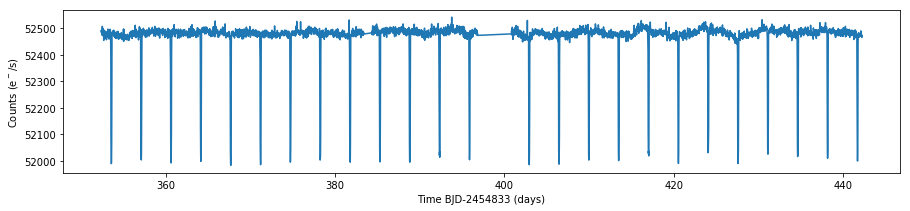

In [9]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
h = fits.open('data/kplr006922244-2010078095331_llc.fits')
h[1].data.names
t,flux=h[1].data['TIME'],h[1].data['PDCSAP_FLUX']
t,flux=t[np.isfinite(flux)],flux[np.isfinite(flux)]

plt.figure(figsize=(15,3))
plt.plot(t,flux)
plt.xlabel('Time BJD-2454833 (days)')
plt.ylabel('Counts (e$^-$/s)')

Because the transit is so obvious and above the noise we are able to use a a simple period finding algorithm to find the transit period. We'll use *gatspy* to find the period. We'll use some bounds so that the period finding algorithm doesn't find spurious signals. The period for this planet should be between $\approx$0.2-10 days.

In [74]:
from gatspy import periodic
model = periodic.LombScargleFast(fit_period=True)
model.optimizer.quiet=True
model.optimizer.period_range = (0.2, 10)
model.fit(t, flux, flux.max()-flux.min())
per=model.best_period
print('Best Period: ',per)

Best Period:  1.76116955512


The best period is $\approx$ 1.76 days. We can phase fold the light curve about this period so that we can see each transit occur at the same time.

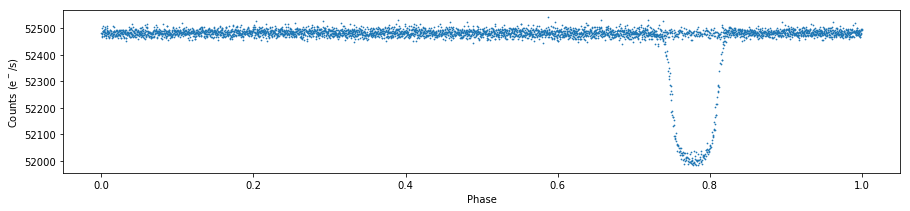

In [19]:
phase = t / per % 1

plt.figure(figsize=(15,3))
plt.scatter(phase,flux,s=0.5)
plt.xlabel('Phase')
plt.ylabel('Counts (e$^-$/s)')

While this has folded to a harmonic of the correct period, this is actually half the period of the planet. Often algorithms will find a period that is half that of the true period, particularly due to deep secondary eclipses. We can rectify this by doubling the period

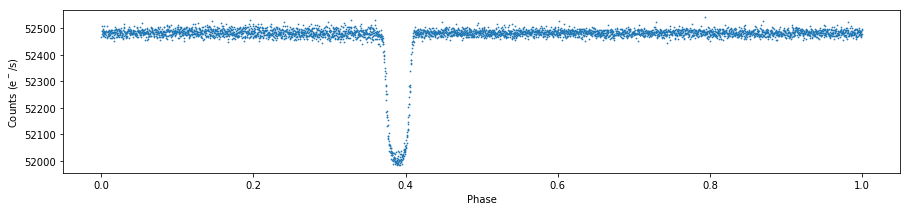

In [20]:
phase = t / (per*2) % 1

plt.figure(figsize=(15,3))
plt.scatter(phase,flux,s=0.5)
plt.xlabel('Phase')
plt.ylabel('Counts (e$^-$/s)')

<!--NAVIGATION-->
< [Investigating Light Curve Files](01.02-Investigating-LC-Files.ipynb) | [Contents](index.ipynb) | [Limb Darkening](01.04-Limb-Darkening.ipynb) >